In [3]:
# -*- coding: utf-8 -*-
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.externals import joblib
import cv2
from scipy.cluster.vq import vq, kmeans
from matplotlib import pyplot as plt
import numpy as np
import time as t
import os
import math
import pandas as pd


In [4]:
def grid_display(list_of_images, list_of_titles=[], no_of_columns=2, figsize=(30,30), ratio=1, conv_color = False):
    
    if conv_color:
        list_of_images = [cv2.cvtColor(image, cv2.COLOR_BGR2RGB) for image in list_of_images]
    
    num_img = len(list_of_images)
    row = math.ceil( num_img / no_of_columns )
    
    if figsize[1] == 0:
        fig = plt.figure(figsize=(figsize[0], figsize[0]*row/no_of_columns/ratio))
    else:
        fig = plt.figure(figsize=figsize)
        
    for i, img in enumerate(list_of_images):
        if list_of_titles != []:
            fig.add_subplot( row, no_of_columns , i+1, title = list_of_titles[i])
        else:
            fig.add_subplot( row, no_of_columns , i+1)
        plt.imshow(list_of_images[i])
        plt.axis('off')
    plt.show()

In [5]:
# set target organ
target_organ = 'cheek_l'

color_labels = ['black', 'blue', 'yellow', 'white', 'red']

folder_color = {'black':'./augmented_data/face_black/',
               'blue':'./augmented_data/face_blue/',
               'yellow':'./augmented_data/face_yellow/',
               'white':'./augmented_data/face_white/',
               'red':'./augmented_data/face_red/',
               }

folder_color = {'0':'./augmented_data/face_black/',
               '1':'./augmented_data/face_blue/',
               '2':'./augmented_data/face_yellow/',
               '3':'./augmented_data/face_white/',
               '4':'./augmented_data/face_red/',
               }

organ_dirs = {'jaw':'jaw/', 
              'cheek_l':'cheek_l/', 
              'cheek_r':'cheek_r/', 
              'nose':'nose/', 
              'lip':'lip/', 
              'forehead':'forehead/', 
              'neck':'neck/'
             }

file_paths = {}
for color in folder_color:
    file_paths[color] = []
    dir_color_organ = folder_color[color] + organ_dirs[target_organ]
    for file_name in os.listdir(dir_color_organ):
        file_paths[color].append(dir_color_organ + file_name)

sample_num = 0
for color in folder_color:
    sample_num += len(file_paths[color])
    print (color)
    print (len(file_paths[color]))


0
188
1
188
2
188
3
188
4
188


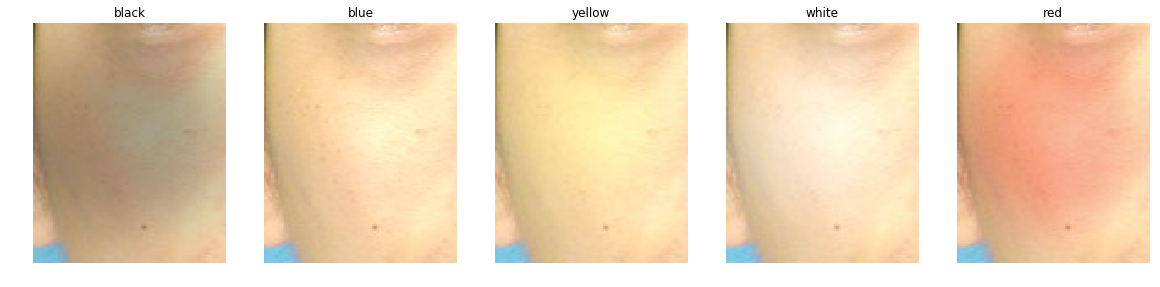

In [4]:
# img[:,:,0] = np.zeros(img[:,:,1].shape)
# img[:,:,1] = np.zeros(img[:,:,2].shape)

# Img2Grey
# gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Grey2Binary
# ret, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
# detect contour
# _, contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)  
# draw contour
# cv2.drawContours(image, contours, contourIdx, color[, thickness[, lineType[, hierarchy[, maxLevel[, offset ]]]]])
# cv2.drawContours(img, contours, 1, (0, 0, 255), 1)

images = []
titles = []
for color in file_paths:
    img = cv2.imread(file_paths[color][0])
    images.append(img)    
    titles.append(color_labels[int(color)])
grid_display(images, titles, 5, (20,10), 1, conv_color = True)

### Use HSV space feature

In [193]:
hsv_image = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
hue, sat, val = hsv_image[:,:,0], hsv_image[:,:,1], hsv_image[:,:,2]

# plt.figure(figsize=(10,8))
# plt.subplot(311)                             #plot in the first cell
# plt.subplots_adjust(hspace=.5)
# plt.title("Hue")
# plt.hist(np.ndarray.flatten(hue), bins=235)
# plt.subplot(312)                             #plot in the second cell
# plt.title("Saturation")
# plt.hist(np.ndarray.flatten(sat), bins=200)
# plt.subplot(313)                             #plot in the third cell
# plt.title("Luminosity Value")
# plt.hist(np.ndarray.flatten(val), bins=200)
# plt.show()

In [194]:
#set feature dimension, e.g.  histogram bin number
dim_h = 180
dim_s = 256
dim_v = 256
hsv_data = np.zeros( ( sample_num, dim_h+dim_s+dim_v  ) )

fp = open('./data/hsv_'+target_organ+'.csv','w',encoding='utf-8')
fp.write( 'color,path,'+','.join([str(i) for i in range(dim_h+dim_s+dim_v)]) +'\r\n' )

for color in file_paths:
    for i, target_organ_path in enumerate( file_paths[color] ):
        img = cv2.imread(target_organ_path)
        hsv_image = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
        # hue(色调): 0-180
        # Saturation(饱和度): 0-255
        # Value(亮度): 0-255
        hue, sat, val = hsv_image[:,:,0], hsv_image[:,:,1], hsv_image[:,:,2]
        # minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(val)
        # print('maxval: {}, minval:{}'.format(maxVal, minVal))
        label = np.array([[color]])
        hist_hue = cv2.calcHist([hsv_image], [0], None, [dim_h], [0, 180])
        hist_sat = cv2.calcHist([hsv_image], [1], None, [dim_s], [0, 256])
        hist_val = cv2.calcHist([hsv_image], [2], None, [dim_v], [0, 256])
        
        hsv_data[i] = np.ndarray.flatten(np.concatenate([hist_hue, hist_sat, hist_val]))
        # write row in csv
        csv_row = ','.join([color, target_organ_path]+[str(i) for i in hsv_data[i]])+'\r\n'
        fp.write(csv_row)
        
print ( csv_row[:100] )
print (hsv_data.shape)

fp.close()


4,./augmented_data/face_red/cheek_l/m-036-01.jpg,6.0,0.0,1.0,2.0,0.0,8.0,386.0,1322.0,2661.0,1988.0,
(940, 692)


### Use RGB space feature

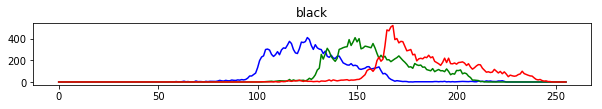

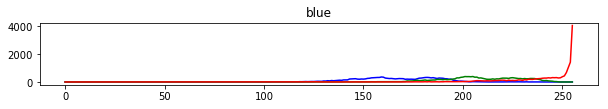

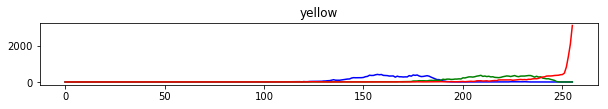

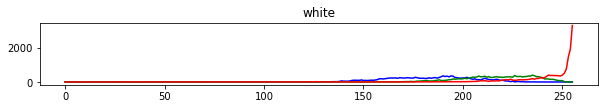

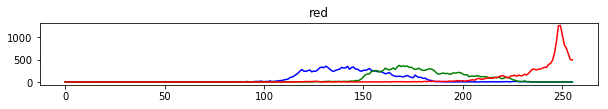

In [5]:
dim = 256
for i, color in enumerate(file_paths):
    img = cv2.imread(file_paths[color][0])
    images.append(img)    
    titles.append(color_labels[int(color)])
    blue, green, red = img[:,:,0], img[:,:,1], img[:,:,2]
    hist_b = cv2.calcHist([img], [0], None, [dim], [0, 256])
    hist_g = cv2.calcHist([img], [1], None, [dim], [0, 256])
    hist_r = cv2.calcHist([img], [2], None, [dim], [0, 256])

    plt.figure(figsize=(10,8))
    plt.subplot(5, 1, i+1)                             #plot in the first cell
    plt.subplots_adjust(hspace=.5)
    plt.title("blue")
    plt.plot(range(dim), hist_b, color = 'b')
    plt.subplot(5, 1, i+1)                              #plot in the second cell
    plt.title("green")
    plt.plot(range(dim), hist_g, color = 'g')
    plt.subplot(5, 1, i+1)                                 #plot in the third cell
    plt.title(titles[i])
    plt.plot(range(dim), hist_r, color = 'r')
    plt.show()

In [6]:
dim = 256

def generate_feature(target_organ):
    bgr_data = np.zeros( ( sample_num, dim*3  ) )

    fp = open('./data/bgr_'+target_organ+'.csv','w',encoding='utf-8')
    fp.write( 'color,path,'+','.join([str(i) for i in range(dim*3)]) +'\r\n' )

    for color in file_paths:
        for i, target_organ_path in enumerate( file_paths[color] ):
            img = cv2.imread(target_organ_path)
            img = cv2.resize(img, (120,120))
            blue, green, red = img[:,:,0], img[:,:,1], img[:,:,2]
            # normailize
        #     img[:,:,0] = blue/256
        #     img[:,:,1] = green/256
        #     img[:,:,2] = red/256
            hist_b = cv2.calcHist([img], [0], None, [dim], [0, 256])
            hist_g = cv2.calcHist([img], [1], None, [dim], [0, 256])
            hist_r = cv2.calcHist([img], [2], None, [dim], [0, 256])
            
            bgr_data[i] = np.ndarray.flatten(np.concatenate([hist_b, hist_g, hist_r]))
            # write row in csv
            csv_row = ','.join([color, target_organ_path]+[str(i) for i in bgr_data[i]])+'\r\n'
            fp.write(csv_row)

#     print ( csv_row[:100] )
#     print (bgr_data.shape)

    fp.close()
    
    return bgr_data

In [7]:
bgr_data = generate_feature(target_organ)

### Data Prepare

In [8]:
from sklearn import metrics
# from sklearn.cross_validation import train_test_split #version < 0.18
from sklearn.model_selection import train_test_split

def prepare_data(target_organ):
    # load data from file
    # tbl = pd.read_csv('./data/hsv_'+target_organ+'.csv')
    tbl = pd.read_csv('./data/bgr_'+target_organ+'.csv')
    sample_label = tbl["color"]
    sample_path = tbl["path"]
    # datafrmae.dropo([], axis = 1), default delete row, axis = 1 means drop colume
    sample_data = tbl.drop(['color','path'],axis = 1)
    
    # split out train data and test data
    data_train, data_test, label_train, label_test = train_test_split(
        sample_data, sample_label, test_size=0.3, random_state=0)
    # try different sample subsets
    data_to_predict = data_test
    label_to_verify = label_test
    # data_to_predict = sample_data
    # label_to_verify = sample_label
#     print (data_train.shape)
#     print (data_test.shape)
    
    return data_train, data_to_predict, label_train, label_to_verify, sample_path

In [9]:
data_train, data_to_predict, label_train, label_to_verify, sample_path = prepare_data(target_organ)

### Show Result

In [10]:
def show_predict_imgs(data_to_predict, sample_path, predict):
    classified_imgs={}
    #store classified result
    for i, label in enumerate(predict):
        orig_index = data_to_predict.index[i]
        if label not in classified_imgs.keys():
            classified_imgs[label] = [cv2.imread(sample_path[orig_index])]
        elif len(classified_imgs[label]) < 60:
            classified_imgs[label].append( cv2.imread(sample_path[orig_index]) )

    for key in classified_imgs:
        print (color_labels[key])
        grid_display(classified_imgs[key], [], 20, (18,0), 1, conv_color = True)

### LinearSVC classification

In [11]:
from sklearn import svm as SVM

def trainSVM(data_train, label_train, data_to_predict, label_to_verify):
    # train data
    clf_svm = SVM.LinearSVC()
    clf_svm.fit(data_train, label_train)
    joblib.dump(clf_svm, './models/svm_'+target_organ+'_model.m')
    svm = joblib.load('./models/svm_'+target_organ+'_model.m')

    # predict data
    predict = clf_svm.predict(data_to_predict)

    ac_score = metrics.accuracy_score(label_to_verify, predict)
    cl_report = metrics.classification_report(label_to_verify, predict)
    print(ac_score)
    print(cl_report)
  
    return predict

In [12]:
predict = trainSVM(data_train, label_train, data_to_predict, label_to_verify)

0.950354609929
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        49
          1       0.92      0.90      0.91        61
          2       0.96      0.90      0.93        61
          3       0.89      0.96      0.92        57
          4       1.00      1.00      1.00        54

avg / total       0.95      0.95      0.95       282



yellow


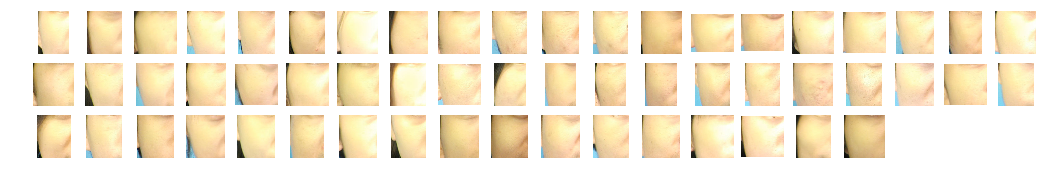

black


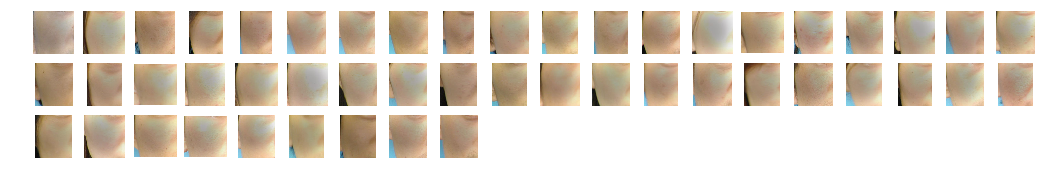

white


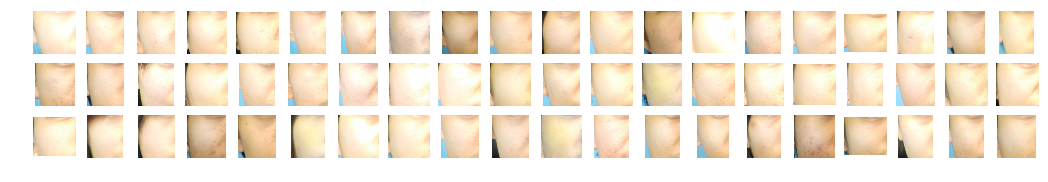

blue


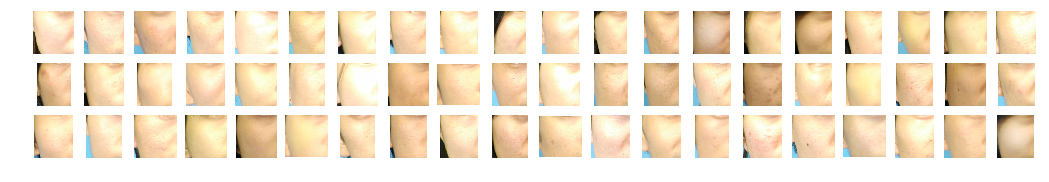

red


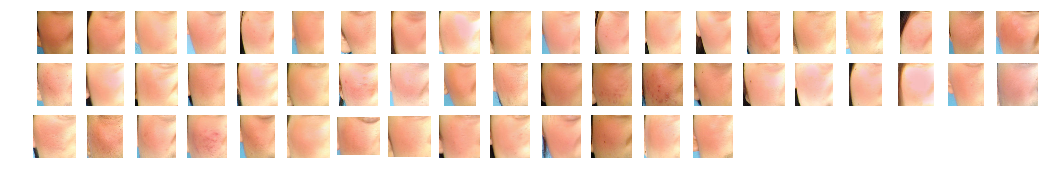

In [13]:
show_predict_imgs(data_to_predict, sample_path, predict)

### KNN classification

In [14]:
from sklearn.neighbors import KNeighborsClassifier

def trainKNN(data_train, label_train, data_to_predict, label_to_verify):
    # train data
    clf_knn = KNeighborsClassifier(n_neighbors = 5)
    clf_knn.fit(data_train, label_train)

    joblib.dump(clf_knn, './models/knn_'+target_organ+'_model.m')
    clf_knn = joblib.load('./models/knn_'+target_organ+'_model.m')

    # predict data
    predict = clf_knn.predict(data_to_predict)

    # model information
    clf_knn.score(data_to_predict, label_to_verify)

    ac_score = metrics.accuracy_score(label_to_verify, predict)
    cl_report = metrics.classification_report(label_to_verify, predict)
    print(ac_score)
    print(cl_report)
    
    return predict

In [15]:
predict = trainKNN(data_train, label_train, data_to_predict, label_to_verify)

0.929078014184
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        49
          1       0.96      0.79      0.86        61
          2       0.92      0.92      0.92        61
          3       0.81      0.96      0.88        57
          4       1.00      1.00      1.00        54

avg / total       0.93      0.93      0.93       282



In [ ]:
show_predict_imgs(data_to_predict, sample_path, predict)

### Logistic Regeression

In [16]:
# https://blog.csdn.net/cymy001/article/details/78533624
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

def trainLR(data_train, label_train, data_to_predict, label_to_verify):
    # normalize train data
    sc = StandardScaler()   #初始化一个对象sc去对数据集作变换
    # sc.fit?
    sc.fit(data_train)   #用对象去拟合数据集X_train，并且存下来拟合参数
    # sc.transform?
    data_train_std = sc.transform(data_train)
    data_test_std = sc.transform(data_to_predict)

    # print ('X_train')
    # print (data_train[:2])
    # print ('X_train_std')
    # print (data_train_std[:2])

    #http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression
    # train linear coefficient
    clf_lr = LogisticRegression(C=1000.0, random_state=0)
    clf_lr.fit(data_train_std, label_train)
    
    joblib.dump(clf_lr, './models/lr_'+target_organ+'_model.m')
    clf_lr = joblib.load('./models/lr_'+target_organ+'_model.m')
    
    # predict data
    cls_prob=clf_lr.predict_proba(data_test_std)

    # np.argmax?
    predict = np.argmax(cls_prob, axis=1)

    # evaluate model
    ac_score = metrics.accuracy_score(label_to_verify, predict)
    cl_report = metrics.classification_report(label_to_verify, predict)
    print(ac_score)
    print(cl_report)
    
    # print (predict.argmax())
    print(clf_lr.coef_.shape)
    
    return predict

In [17]:
predict = trainLR(data_train, label_train, data_to_predict, label_to_verify)

0.925531914894
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        49
          1       0.91      0.84      0.87        61
          2       0.89      0.93      0.91        61
          3       0.85      0.91      0.88        57
          4       1.00      0.96      0.98        54

avg / total       0.93      0.93      0.93       282

(5, 768)


In [ ]:
show_predict_imgs(data_to_predict, sample_path, predict)

### Multi-Layer Perceptron

In [18]:
from sklearn.neural_network import MLPClassifier

def trainMLP(data_train, label_train, data_to_predict, label_to_verify):
    # normalize train data
    sc = StandardScaler()   #初始化一个对象sc去对数据集作变换
    # sc.fit?
    sc.fit(data_train)   #用对象去拟合数据集X_train，并且存下来拟合参数
    # sc.transform?
    data_train_std = sc.transform(data_train)
    data_test_std = sc.transform(data_to_predict)    
    
    # 设置神经网络模型参数
    # mlp = MLPClassifier(solver='lbfgs', activation='relu',alpha=1e-4,hidden_layer_sizes=(50,50), random_state=1,max_iter=10,verbose=10,learning_rate_init=.1)
    # 使用solver='lbfgs',准确率为79%，比较适合小(少于几千)数据集来说，且使用的是全训练集训练，比较消耗内存
    # mlp = MLPClassifier(solver='adam', activation='relu',alpha=1e-4,hidden_layer_sizes=(50,50), random_state=1,max_iter=10,verbose=10,learning_rate_init=.1)
    # 使用solver='adam'，准确率只有67%
    clf_mlp = MLPClassifier(solver='sgd', activation='relu',alpha=1e-4,hidden_layer_sizes=(50,50), random_state=1,max_iter=100,verbose=10,learning_rate_init=.1)
    # 使用solver='sgd'，准确率为98%，且每次训练都会分batch，消耗更小的内存

    # 训练模型
    clf_mlp.fit(data_train_std, label_train)
    
    joblib.dump(clf_mlp, './models/mlp_'+target_organ+'_model.m')
    clf_mlp = joblib.load('./models/mlp_'+target_organ+'_model.m')
    
    # help(mlp)
    predict = clf_mlp.predict(data_to_predict)

    # evaluate model
    print (clf_mlp.score(data_to_predict,label_to_verify))
    print (clf_mlp.n_layers_)
    print (clf_mlp.n_iter_)
    print (clf_mlp.loss_)
    print (clf_mlp.out_activation_)
    
    # evaluate model
    ac_score = metrics.accuracy_score(label_to_verify, predict)
    cl_report = metrics.classification_report(label_to_verify, predict)
    print(ac_score)
    print(cl_report)
    
    return predict

In [19]:
predict = trainLR(data_train, label_train, data_to_predict, label_to_verify)

0.925531914894
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        49
          1       0.91      0.84      0.87        61
          2       0.89      0.93      0.91        61
          3       0.85      0.91      0.88        57
          4       1.00      0.96      0.98        54

avg / total       0.93      0.93      0.93       282

(5, 768)


In [ ]:
show_predict_imgs(data_to_predict, sample_path, predict)

### train models

In [20]:
# set target organ
target_organs = ['jaw', 'cheek_l', 'cheek_r', 'nose', 'forehead']
for target_organ in target_organs:
    print (target_organ)
    bgr_data = generate_feature(target_organ)
    data_train, data_to_predict, label_train, label_to_verify, sample_path = prepare_data(target_organ)
    print ('SVM')
    predict = trainSVM(data_train, label_train, data_to_predict, label_to_verify)
    print ('KNN')
    predict = trainKNN(data_train, label_train, data_to_predict, label_to_verify)
    print ('LR')
    predict = trainLR(data_train, label_train, data_to_predict, label_to_verify)
    print ('MLP')
    predict = trainMLP(data_train, label_train, data_to_predict, label_to_verify)

jaw
SVM
0.950354609929
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        49
          1       0.92      0.90      0.91        61
          2       0.96      0.90      0.93        61
          3       0.89      0.96      0.92        57
          4       1.00      1.00      1.00        54

avg / total       0.95      0.95      0.95       282

KNN
0.929078014184
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        49
          1       0.96      0.79      0.86        61
          2       0.92      0.92      0.92        61
          3       0.81      0.96      0.88        57
          4       1.00      1.00      1.00        54

avg / total       0.93      0.93      0.93       282

LR
0.925531914894
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        49
          1       0.91      0.84      0.87        61
          2       0.89      0.93

SVM
0.950354609929
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        49
          1       0.92      0.90      0.91        61
          2       0.96      0.90      0.93        61
          3       0.89      0.96      0.92        57
          4       1.00      1.00      1.00        54

avg / total       0.95      0.95      0.95       282

KNN
0.929078014184
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        49
          1       0.96      0.79      0.86        61
          2       0.92      0.92      0.92        61
          3       0.81      0.96      0.88        57
          4       1.00      1.00      1.00        54

avg / total       0.93      0.93      0.93       282

LR
0.925531914894
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        49
          1       0.91      0.84      0.87        61
          2       0.89      0.93    